In [1]:
import pandas as pd
df = pd.read_csv("digital_marketing_campaign_dataset.csv")
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [2]:
print(df.columns)
print(df.info())

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate    

In [3]:
df["opened"] = (df["EmailOpens"] > 0).astype(int)
df["clicked"] = (df["EmailClicks"] > 0).astype(int)
df["converted"] = df["Conversion"]   # already 0/1

## Probability user clicks

In [4]:
p_click = df["clicked"].mean()
print("P(Click) =", round(p_click, 3))

P(Click) = 0.901


## Probability convert given clicked

In [5]:
p_convert_given_click = df[df["clicked"] == 1]["converted"].mean()
print("P(Convert | Click) =", round(p_convert_given_click, 3))

P(Convert | Click) = 0.885


## Conditional Probability Table (CPT)

In [6]:
cpt = pd.crosstab(
    df["clicked"],
    df["converted"],
    normalize="index"
)
print(cpt)

converted         0         1
clicked                      
0          0.204030  0.795970
1          0.114627  0.885373


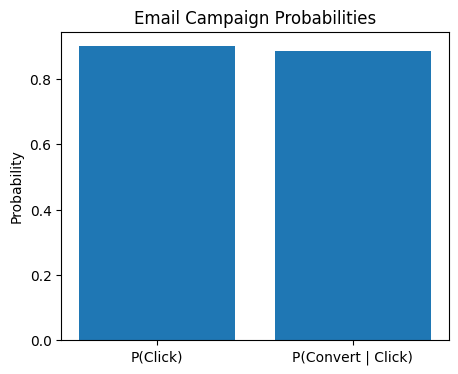

In [7]:
import matplotlib.pyplot as plt
vals = [p_click, p_convert_given_click]
labels = ["P(Click)", "P(Convert | Click)"]
plt.figure(figsize=(5,4))
plt.bar(labels, vals)
plt.ylabel("Probability")
plt.title("Email Campaign Probabilities")
plt.show()

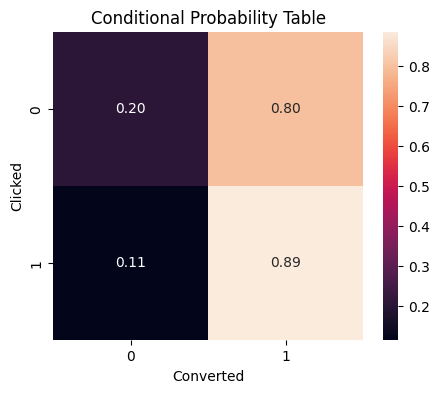

In [8]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cpt, annot=True, fmt=".2f")
plt.title("Conditional Probability Table")
plt.xlabel("Converted")
plt.ylabel("Clicked")
plt.show()